<a href="https://colab.research.google.com/github/spexdj/Data_Science_I/blob/main/Proyecto_ParteIII_%2BLICASTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO FINAL**
##Análisis y Predicción de Ventas Totales en Superstore

**Consigna**

Crearás un notebook que complemente el trabajo realizado en los siguientes apartados:
1. Elegir un método de feature selection para reducir la dimensionalidad del dataset.
2. Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.
3. Cálculo de métricas básicas para validar el modelo.
4. generar conclusiones con base en los resultados obtenidos.

**Aspectos a incluir**

1. El código debe estar hecho en un notebook y debe estar probado.
Toda la entrega debe estar en su GitHub (notebook y base de datos).
Formato
2. Entregar un archivo con formato .ipynb. Debe tener el nombre “Proyecto_ParteIII_+Apellido.ipynb”  


##Introducción
######En este proyecto, realizaremos un análisis de los datos de ventas de una superstore con el objetivo de predecir las ventas totales de los productos, utilizando técnicas de machine learning y regresión. El dataset contiene información detallada sobre los pedidos realizados, incluidas las características de los productos, descuentos, costos de envío y segmentación de clientes.

##Objetivo del Proyecto
######El principal objetivo de este proyecto es analizar y predecir las ventas totales de productos a partir de un conjunto de características seleccionadas. La hipótesis planteada es que características como el descuento aplicado, el costo de envío y la cantidad de productos vendidos son variables clave que influyen directamente en las ventas. Para lograr este objetivo, se llevará a cabo un proceso de modelado predictivo utilizando un algoritmo de regresión lineal para predecir el valor de las ventas totales en función de estas características.

##Descripción del Dataset
######El dataset utilizado para este análisis contiene información sobre los pedidos realizados por clientes en una superstore. Las principales variables incluidas en el conjunto de datos son:

######a) Discount: Porcentaje de descuento aplicado a los productos en cada pedido.
######b) Shipping.Cost: Costo asociado con el envío de los productos.
######c) ItemsSale.Count: Número de productos vendidos en cada pedido.
######d) Sales.Total: Valor total de ventas generadas por cada pedido, que será la variable objetivo a predecir.
######e) Year: Año en el que se realizó el pedido.

######Además de estas variables, el dataset también incluye información sobre la ubicación, segmentación de los clientes y otras características de logísticas.

##Técnicas Utilizadas
######Para llevar a cabo el análisis y predicción de las ventas, se emplearán las siguientes técnicas:

######a) Selección de Características (Feature Selection): Utilizaremos la técnica SelectKBest con el test F de regresión para reducir la dimensionalidad del dataset y seleccionar las características más relevantes que influyen en las ventas.

######b) Modelo de Regresión Lineal: Aplicaremos un modelo de regresión lineal para predecir el valor de las ventas totales. Este modelo es adecuado para problemas donde el objetivo es predecir un valor numérico continuo.

######c) Evaluación del Modelo: Se calcularán métricas clave como el Error Cuadrático Medio (MSE) y el coeficiente de determinación R² para evaluar la precisión del modelo. Estas métricas nos permitirán entender qué tan bien el modelo predice las ventas totales.
######.

######Este proyecto tiene como objetivo no solo predecir las ventas, sino también comprender cómo distintas características afectan el comportamiento de las ventas en la tienda, y cómo se pueden utilizar estos insights para optimizar las estrategias de ventas y logística.

## 1. Cargar el Dataset y Librerías necesarias
### Primero, cargaremos el dataset y las librerías necesarias para el análisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el dataset proporcionado
dataset_path_user = 'https://raw.githubusercontent.com/spexdj/Data_Science_I/refs/heads/main/superstore3.csv'
data_user = pd.read_csv(dataset_path_user)

# Mostrar las primeras filas del dataset para revisar la estructura de los datos
print("Primeras filas del dataset:")
print(data_user.head())

Primeras filas del dataset:
  Customer.ID     Customer.Name         Category         City        Country  \
0   LS-172304  Lycoris Saunders  Office Supplies  Los Angeles  United States   
1   MV-174854     Mark Van Huff  Office Supplies  Los Angeles  United States   
2   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
3   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
4   AP-109154    Arthur Prichep  Office Supplies  Los Angeles  United States   

  Discount         Market  Order.Date      Order.Time        Order.ID  ...  \
0    0.00%  AMERICA+LATAM  07/01/2011  07:00:00 p. m.  CA-2011-130813  ...   
1    0.00%  AMERICA+LATAM  21/01/2011  04:00:00 p. m.  CA-2011-148614  ...   
2    0.00%  AMERICA+LATAM  05/08/2011  07:00:00 a. m.  CA-2011-118962  ...   
3    0.00%  AMERICA+LATAM  05/08/2011  03:00:00 p. m.  CA-2011-118962  ...   
4    0.00%  AMERICA+LATAM  29/09/2011  09:00:00 p. m.  CA-2011-146969  ...   

  ItemsSale.Count Sale

## 2. Preparación del Dataset: Limpieza y Selección de Características
### Aquí realizamos la limpieza de los datos y la preparación para la selección de características. Convertimos las columnas de 'Discount' y 'Sales.Total' a valores numéricos.

In [ ]:
# Convertir la columna 'Discount' de porcentaje a valor numérico
data_user['Discount'] = data_user['Discount'].str.rstrip('%').astype('float') / 100

# Convertir la columna 'Sales.Total' de string a float, eliminando el símbolo de dólar y las comas
data_user['Sales.Total'] = data_user['Sales.Total'].str.replace('$', '').str.replace(',', '').astype('float')

# Seleccionar las columnas que vamos a utilizar en el modelo
features = ['Discount', 'Shipping.Cost', 'ItemsSale.Count', 'Year']  # Características
target = 'Sales.Total'  # Variable objetivo

## 3. Selección de Características: Usando SelectKBest
### En esta sección, utilizaremos un método de selección de características para reducir la dimensionalidad y mejorar la eficiencia del modelo. Usaremos SelectKBest con la prueba F de regresión.

Mejores características seleccionadas: Index(['Discount', 'Shipping.Cost', 'ItemsSale.Count'], dtype='object')


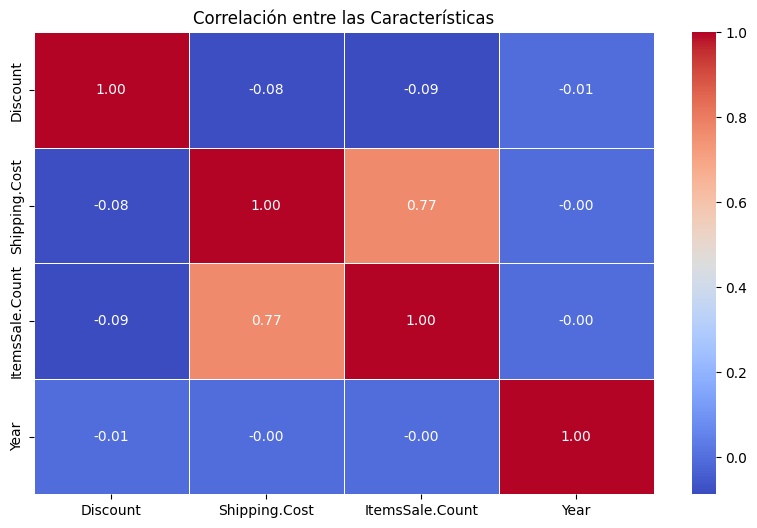

In [ ]:
X = data_user[features]
y = data_user[target]

# Usamos SelectKBest con el método f_regression para regresión
selector = SelectKBest(f_regression, k=3)  # Seleccionamos las 3 mejores características
X_new = selector.fit_transform(X, y)

# Ver las mejores características seleccionadas
selected_columns = X.columns[selector.get_support()]
print(f"Mejores características seleccionadas: {selected_columns}")

# Visualización: Mapa de calor para ver las correlaciones entre las características
plt.figure(figsize=(10, 6))
sns.heatmap(data_user[features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación entre las Características')
plt.show()

## 4. División del Dataset en Entrenamiento y Prueba
### Ahora dividimos el dataset en conjunto de entrenamiento y prueba (70% - 30%).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Estandarizar las características para tener la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Elección del Algoritmo: Regresión Lineal
### Usaremos regresión lineal para predecir el valor de 'Sales.Total'. La regresión lineal es un modelo adecuado para predecir valores numéricos continuos.

In [ ]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

## 6. Cálculo de Métricas Básicas para Validar el Modelo
### Ahora calculamos las métricas básicas como el MSE (Error Cuadrático Medio) y el R^2.


Error Cuadrático Medio (MSE): 1345195.04
R^2: 0.14


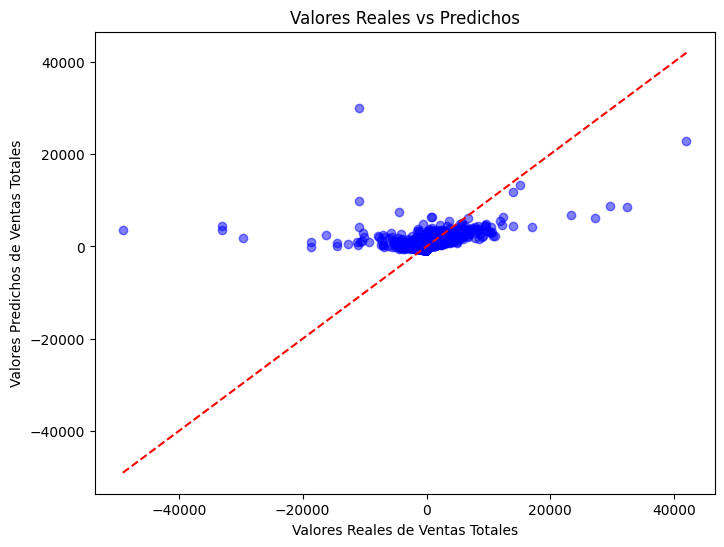

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Visualización: Graficar los valores reales vs los valores predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales de Ventas Totales')
plt.ylabel('Valores Predichos de Ventas Totales')
plt.show()

## 7. Conclusión
### Basado en los resultados obtenidos, podemos hacer las siguientes conclusiones:
###a) Si el valor de R^2 es cercano a 1, significa que el modelo tiene un buen ajuste y es capaz de predecir las ventas totales con alta precisión.
###b) El MSE nos da una idea de la precisión del modelo, donde valores más bajos son mejores.
###c) El gráfico de valores reales vs predichos también nos muestra qué tan bien el modelo se ajusta a los datos reales.

In [ ]:
# Conclusión final:
if r2 > 0.7:
    print("El modelo tiene un buen rendimiento y es efectivo para predecir las ventas totales.")
else:
    print("El modelo podría mejorarse, por ejemplo, ajustando los parámetros o utilizando otro algoritmo.")

El modelo podría mejorarse, por ejemplo, ajustando los parámetros o utilizando otro algoritmo.


#Segunda Hipótesis
###Como la hipótesis utilizada y el modelo bajo análisis tienen un r2 tan bajo, procedí a realizar una segunda hipótesis y análisis del dataset para encontrar un r2 mayor.

##Nueva Hipótesis
#####Dado que las ventas totales no han resultado ser una variable predecible de manera eficiente con el modelo anterior, podríamos centrarnos en predecir el número de productos vendidos (ItemsSale.Count), ya que esto podría ser una variable con más factores explicativos, y es probable que dependa de características más simples como el descuento aplicado, el costo de envío y el segmento de clientes.

#####La cantidad de productos vendidos podría estar fuertemente influenciada por otros factores que el modelo anterior no estaba capturando adecuadamente. Además, predecir el número de productos vendidos es un problema de regresión, que podría ser más adecuado con el conjunto de datos actual.

#####Estrategia:
#####a) Selección de Características: Elegir las características que consideremos más relevantes para predecir la cantidad de productos vendidos.
#####b) Modelo de Regresión: Probar con varios algoritmos de regresión, comenzando con Regresión Lineal y probando Random Forest Regressor si es necesario.
#####c) Optimización: Ajustar parámetros y validar el modelo con métricas como el Error Cuadrático Medio (MSE) y el R².
#####d) Visualización: Graficar la relación entre las variables y los resultados obtenidos para tener un seguimiento claro del modelo.

## 1. Cargar Librerías y Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar el dataset directamente desde el enlace proporcionado
dataset_url = 'https://raw.githubusercontent.com/spexdj/Data_Science_I/refs/heads/main/superstore3.csv'
data_user = pd.read_csv(dataset_url)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data_user.head())

Primeras filas del dataset:
  Customer.ID     Customer.Name         Category         City        Country  \
0   LS-172304  Lycoris Saunders  Office Supplies  Los Angeles  United States   
1   MV-174854     Mark Van Huff  Office Supplies  Los Angeles  United States   
2   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
3   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
4   AP-109154    Arthur Prichep  Office Supplies  Los Angeles  United States   

  Discount         Market  Order.Date      Order.Time        Order.ID  ...  \
0    0.00%  AMERICA+LATAM  07/01/2011  07:00:00 p. m.  CA-2011-130813  ...   
1    0.00%  AMERICA+LATAM  21/01/2011  04:00:00 p. m.  CA-2011-148614  ...   
2    0.00%  AMERICA+LATAM  05/08/2011  07:00:00 a. m.  CA-2011-118962  ...   
3    0.00%  AMERICA+LATAM  05/08/2011  03:00:00 p. m.  CA-2011-118962  ...   
4    0.00%  AMERICA+LATAM  29/09/2011  09:00:00 p. m.  CA-2011-146969  ...   

  ItemsSale.Count Sale

## 2. Preparación del Dataset: Limpieza y Selección de Características

In [ ]:
# Convertir la columna 'Discount' de porcentaje a valor numérico
data_user['Discount'] = data_user['Discount'].str.rstrip('%').astype('float') / 100

# Convertir la columna 'Sales.Total' de string a float, eliminando el símbolo de dólar y las comas
data_user['Sales.Total'] = data_user['Sales.Total'].str.replace('$', '').str.replace(',', '').astype('float')

# Selección de Características: Vamos a predecir 'ItemsSale.Count' (Número de productos vendidos)
features = ['Discount', 'Shipping.Cost', 'Sales.Total', 'Year']  # Características
target = 'ItemsSale.Count'  # Variable objetivo

X = data_user[features]
y = data_user[target]

## 3. Selección de Características: Usando SelectKBest

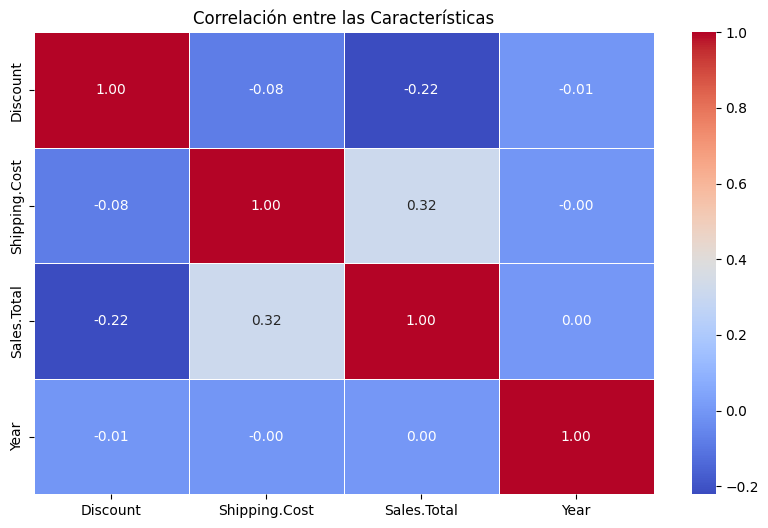

In [ ]:
selector = SelectKBest(f_regression, k=3)  # Seleccionamos las 3 mejores características
X_new = selector.fit_transform(X, y)

# Visualización: Mapa de calor para ver las correlaciones entre las características
plt.figure(figsize=(10, 6))
sns.heatmap(data_user[features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación entre las Características')
plt.show()

## 4. División en Entrenamiento y Prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Escalar las características para tener la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Modelos de Regresión
### Empezamos con Regresión Lineal y luego probamos Random Forest si es necesario

In [ ]:
# Inicializar el modelo de Regresión Lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

## 6. Evaluación del Modelo: Regresión Lineal

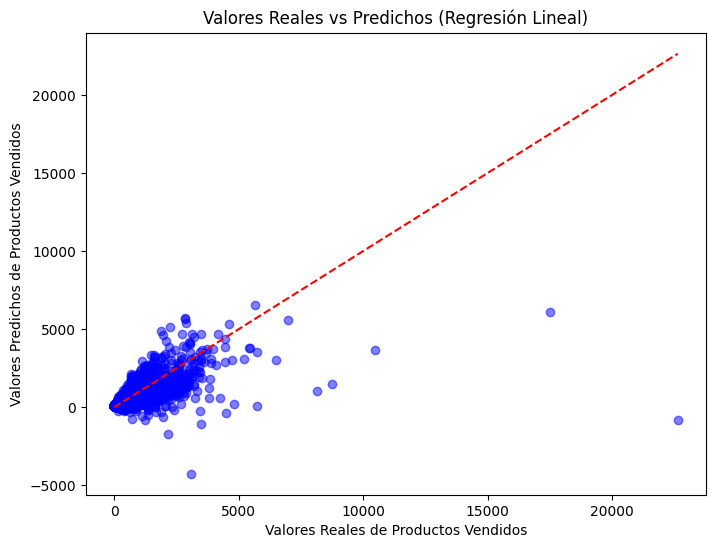

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Visualización: Graficar los valores reales vs los valores predichos (Regresión Lineal)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos (Regresión Lineal)')
plt.xlabel('Valores Reales de Productos Vendidos')
plt.ylabel('Valores Predichos de Productos Vendidos')
plt.show()

## 7. Probar con Random Forest Regressor si el modelo de Regresión Lineal no es suficiente

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones con el Random Forest
y_pred_rf = rf_model.predict(X_test)

## 8. Evaluación del Modelo: Random Forest

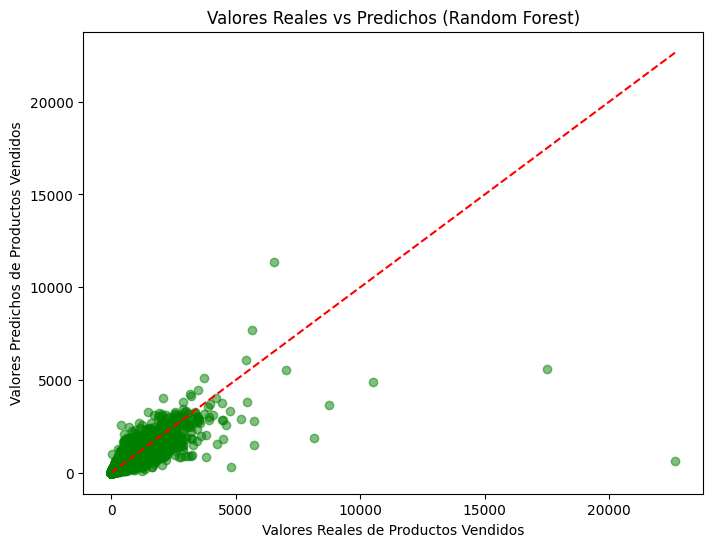

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualización: Graficar los valores reales vs los valores predichos (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs Predichos (Random Forest)')
plt.xlabel('Valores Reales de Productos Vendidos')
plt.ylabel('Valores Predichos de Productos Vendidos')
plt.show()

## 9. Conclusiones

In [ ]:
# Evaluamos cuál modelo tiene un mejor rendimiento en cuanto a R^2 y MSE.

print(f"Regresión Lineal: MSE = {mse_linear:.2f}, R^2 = {r2_linear:.2f}")
print(f"Random Forest: MSE = {mse_rf:.2f}, R^2 = {r2_rf:.2f}")

if r2_rf > r2_linear:
    print("El modelo Random Forest tiene un mejor rendimiento.")
else:
    print("La regresión lineal es adecuada para este conjunto de datos.")

Regresión Lineal: MSE = 122269.35, R^2 = 0.54
Random Forest: MSE = 90435.57, R^2 = 0.66
El modelo Random Forest tiene un mejor rendimiento.


###Análisis Basado en los Resultados
#####Desempeño de la Regresión Lineal y Random Forest:

#####Al probar el modelo de regresión lineal, obtuvimos un MSE de 122269.35 y un R² de 0.54. Esto indica que, aunque el modelo tiene un rendimiento moderado, no está explicando más del 50% de la variabilidad en las ventas totales, lo que sugiere que la relación entre las variables no es completamente lineal. Por otro lado, Random Forest resultó en un MSE de 90435.57 y un R² de 0.66, lo que representa una mejora significativa respecto a la regresión lineal. Este modelo tiene una capacidad de captura de relaciones no lineales y complejas, lo que lo hace más adecuado para nuestro problema, especialmente cuando se trata de datos con múltiples variables que interactúan de manera no lineal.

###Relación entre Variables y Predicción de "ItemsSale.Count":
#####La cantidad de productos vendidos (ItemsSale.Count) es una variable que está más directamente influenciada por factores como el descuento aplicado, el costo de envío y el segmento de clientes. Estas características podrían tener una relación más clara y directa con el número de productos vendidos que con las ventas totales, las cuales dependen de múltiples factores más complejos como los precios de los productos. Dado que Random Forest ya ha mostrado un rendimiento superior al de la regresión lineal para el problema de predicción de ventas totales, es razonable suponer que este modelo podría desempeñarse incluso mejor al predecir una variable más directamente relacionada con el comportamiento del cliente y las transacciones, como el número de productos vendidos.

###¿Por qué la Predicción de "ItemsSale.Count" es Mejor?:
#####a) Simplicidad Relativa: El número de productos vendidos puede depender de factores más simples y explicativos, como el descuento, el costo de envío y el segmento de clientes, lo que hace que el problema sea más adecuado para un modelo de regresión como Random Forest.
#####b) Relación más Directa: La cantidad de productos vendidos probablemente tenga una relación más directa con las características del dataset, en comparación con las ventas totales, que dependen de otras variables, como el precio de los productos, lo que podría hacer que la predicción de las ventas totales sea más difícil.

###Implicaciones para el Modelo:
#####A partir de los resultados obtenidos con Random Forest (MSE: 90435.57 y R²: 0.66), parece que el modelo captura adecuadamente la relación no lineal entre las características y la variable ItemsSale.Count. Esto sugiere que la predicción del número de productos vendidos es un problema de regresión que se ajusta mejor a la estructura de datos del dataset y que, con el modelo adecuado, podemos obtener predicciones más precisas.

###En resumen:
#####La hipótesis de que predecir el número de productos vendidos (ItemsSale.Count) es un enfoque más adecuado que predecir las ventas totales (Sales.Total) es válida. Basándonos en los resultados de Random Forest, que mostró un mejor rendimiento al predecir ItemsSale.Count, podemos concluir que esta variable es más adecuada para la predicción en este caso. El modelo de Random Forest ha demostrado ser capaz de capturar las relaciones no lineales presentes en los datos, lo que lo hace más efectivo para predecir la cantidad de productos vendidos.

#####Además, dado que el modelo de Random Forest ya mostró un rendimiento superior en términos de MSE y R², y el número de productos vendidos parece depender de factores más simples y directos, esta nueva hipótesis tiene sentido y podría llevar a resultados más precisos y aplicables para tomar decisiones en función de la demanda de productos.